# <span style="color: #2E86C1; font-family: Arial, sans-serif;">Task-05: Traffic Accident Data Analysis and Hotspot Visualization</span>
#### <span style="font-family: 'Courier New', Courier, monospace;">Developed by: Azhar Derardja</span>


##  Importing the necessary libraries

In [25]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset
df = pd.read_csv('US_Accidents.csv')


## Reading the dataset

In [26]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


## Information about the dataframe

In [27]:
df.shape

(1048575, 47)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  object 
 1   Severity               1048575 non-null  int64  
 2   Start_Time             1048575 non-null  object 
 3   End_Time               1048575 non-null  object 
 4   Start_Lat              1048575 non-null  float64
 5   Start_Lng              1048575 non-null  float64
 6   End_Lat                1048575 non-null  float64
 7   End_Lng                1048575 non-null  float64
 8   Distance(mi)           1048575 non-null  float64
 9   Description            1048575 non-null  object 
 10  Number                 360065 non-null   float64
 11  Street                 1048575 non-null  object 
 12  Side                   1048575 non-null  object 
 13  City                   1048506 non-null  object 
 14  County            

In [29]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,1048575.0,2.164623,0.546091,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,1048575.0,36.462921,5.165882,24.570584,33.710335,36.357203,40.234894,49.000580
Start_Lng,1048575.0,-97.202025,18.319835,-124.497470,-118.035800,-92.925860,-80.384256,-67.113167
End_Lat,1048575.0,36.463048,5.165957,24.574326,33.711880,36.356653,40.234707,49.075000
End_Lng,1048575.0,-97.201812,18.319629,-124.497470,-118.036120,-92.928280,-80.384694,-67.109242
Distance(mi),1048575.0,0.586753,1.601684,0.000000,0.000000,0.138000,0.591000,155.186000
Number,360065.0,7869.769653,15619.751306,1.000000,1175.000000,3771.000000,9229.000000,961005.000000
Temperature(F),1017832.0,59.157968,17.782436,-89.000000,47.000000,60.000000,73.000000,129.200000
Wind_Chill(F),813974.0,55.283185,20.048839,-89.000000,42.000000,57.000000,70.000000,113.000000
Humidity(%),1015803.0,65.539869,22.984384,2.000000,49.000000,69.000000,85.000000,100.000000


In [31]:
df.describe(include=object)

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,1048575,1048575,1048575,1048575,1048575,1048575,1048506,1048575,1048575,1048086,1048575,1047421,1045917,1026460,1017532,1018315,1048506,1048506,1048506,1048506
unique,1048575,420502,425801,407542,82051,2,9600,1578,49,145070,1,4,1911,183423,24,103,2,2,2,2
top,A-2716600,37:00.0,45:00.0,A crash has occurred causing no to minimum del...,I-95 N,R,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,16-12-2020 13:53,CALM,Fair,Day,Day,Day,Day
freq,1,370,547,2709,15738,883305,30848,90720,307801,2492,1048575,438897,20150,468,165518,370030,583956,621449,663433,700351


## Checking for null/missing values in the dataset

In [32]:
df.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   688510
Street                        0
Side                          0
City                         69
County                        0
State                         0
Zipcode                     489
Country                       0
Timezone                   1154
Airport_Code               2658
Weather_Timestamp         22115
Temperature(F)            30743
Wind_Chill(F)            234601
Humidity(%)               32772
Pressure(in)              25460
Visibility(mi)            30815
Wind_Direction            31043
Wind_Speed(mph)           67910
Precipitation(in)        259241
Weather_Condition         30260
Amenity                       0
Bump    

## Dropping the columns with huge number of null values

In [33]:
df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [34]:
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [35]:
df.isna().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Number                   688510
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)            30743
Humidity(%)               32772
Pressure(in)              25460
Visibility(mi)            30815
Wind_Direction                0
Wind_Speed(mph)           67910
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit 

## Checking for duplicate values

In [36]:
df.duplicated().sum()

0

# EDA

## City with most Number of accidents

In [37]:
city_acc = df['City'].value_counts().sort_values(ascending = False).reset_index()

In [38]:
city_acc

,City,count
0,Miami,30917
1,Los Angeles,26699
2,Charlotte,18749
3,Houston,14395
4,Dallas,14182
...,...,...
9595,Willowick,1
9596,Canandaigua,1
9597,Coden,1
9598,Prosper,1


## Top 10 cities with most number of accidents

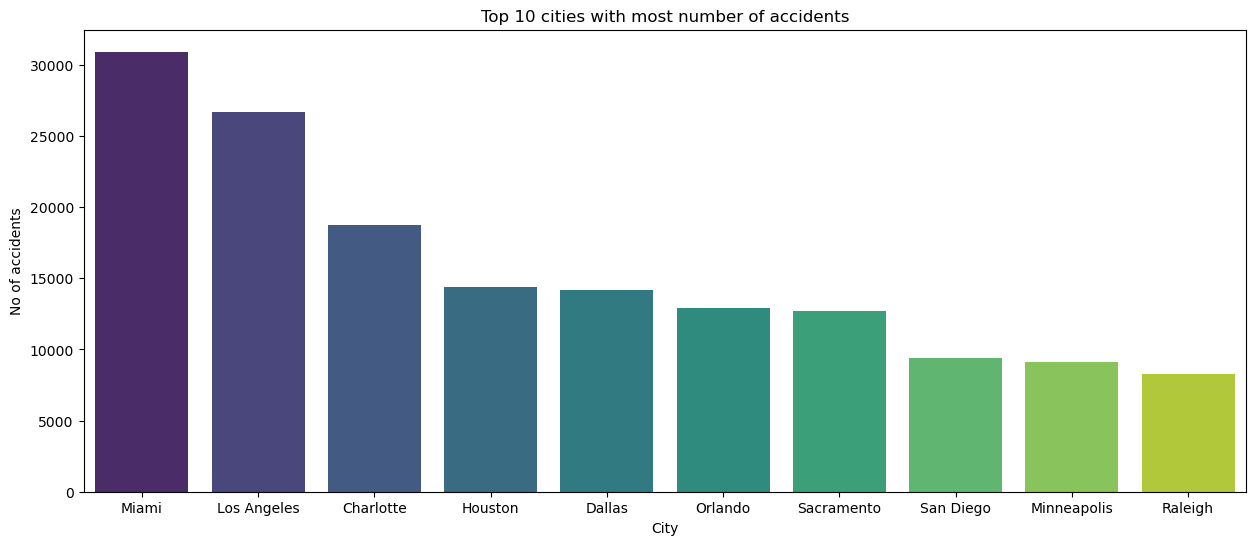

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.head(10),palette='viridis')
plt.title("Top 10 cities with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## Bottom 10 cities with least number of accidents

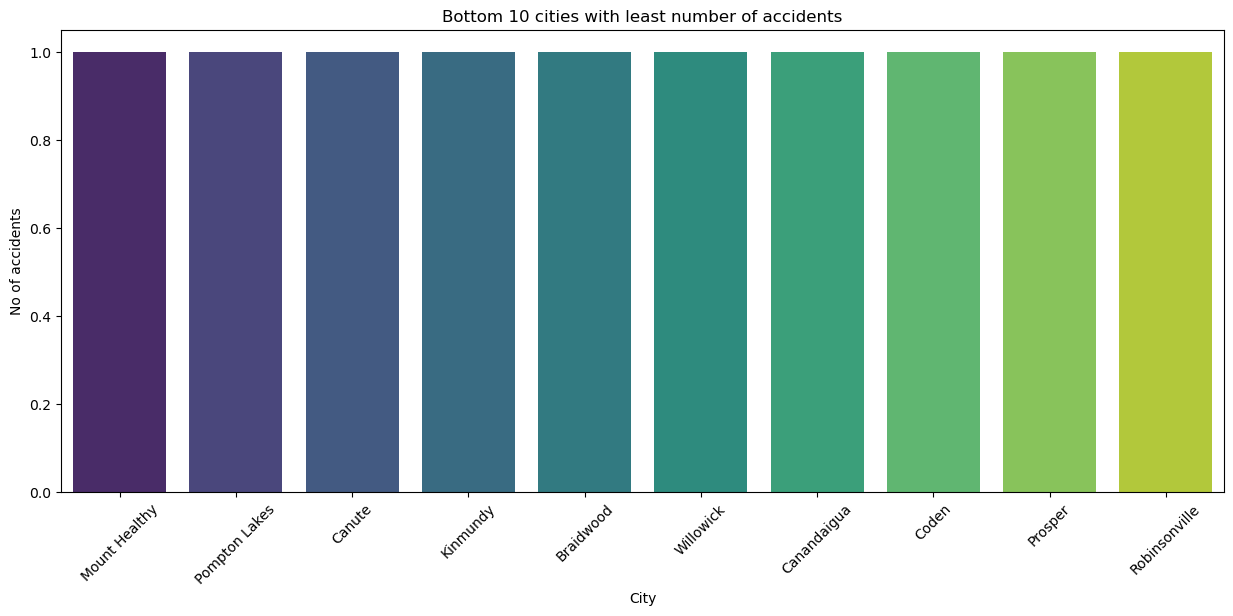

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x='City',y='count',data= city_acc.tail(10),palette='viridis')
plt.title("Bottom 10 cities with least number of accidents")
plt.ylabel("No of accidents")
plt.xticks(rotation=45)
plt.show()

## State with most and least Number of accidents

In [41]:
state_acc = df['State'].value_counts().sort_values(ascending = False).reset_index()
state_acc

,State,count
0,CA,307801
1,FL,124097
2,TX,53779
3,NY,44559
4,NC,40815
5,MN,40389
6,VA,39548
7,PA,38454
8,OR,37743
9,MD,25787


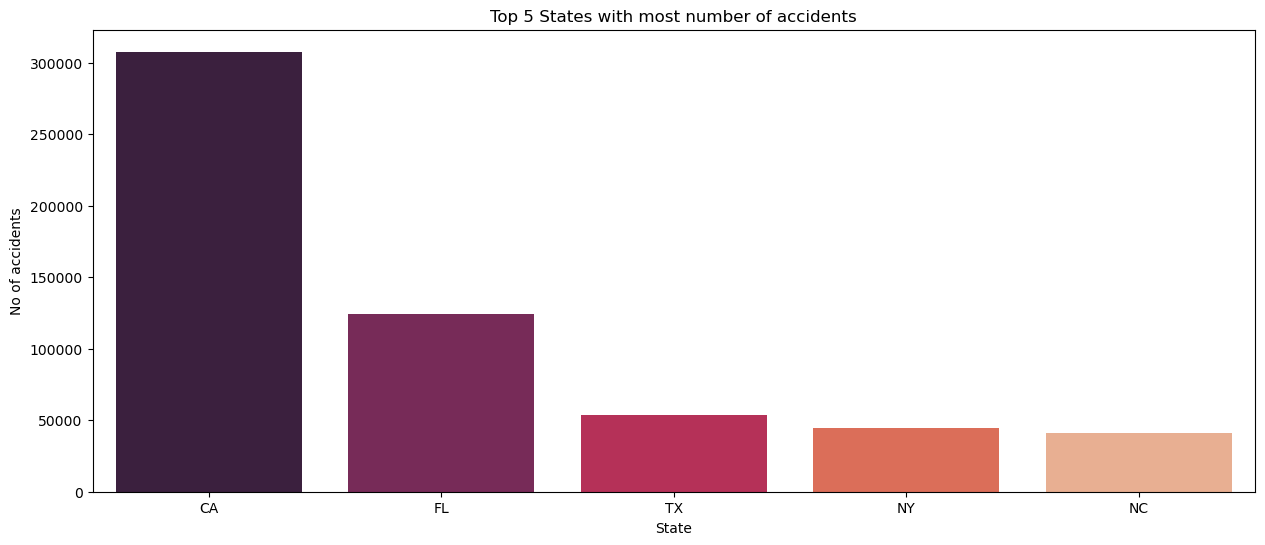

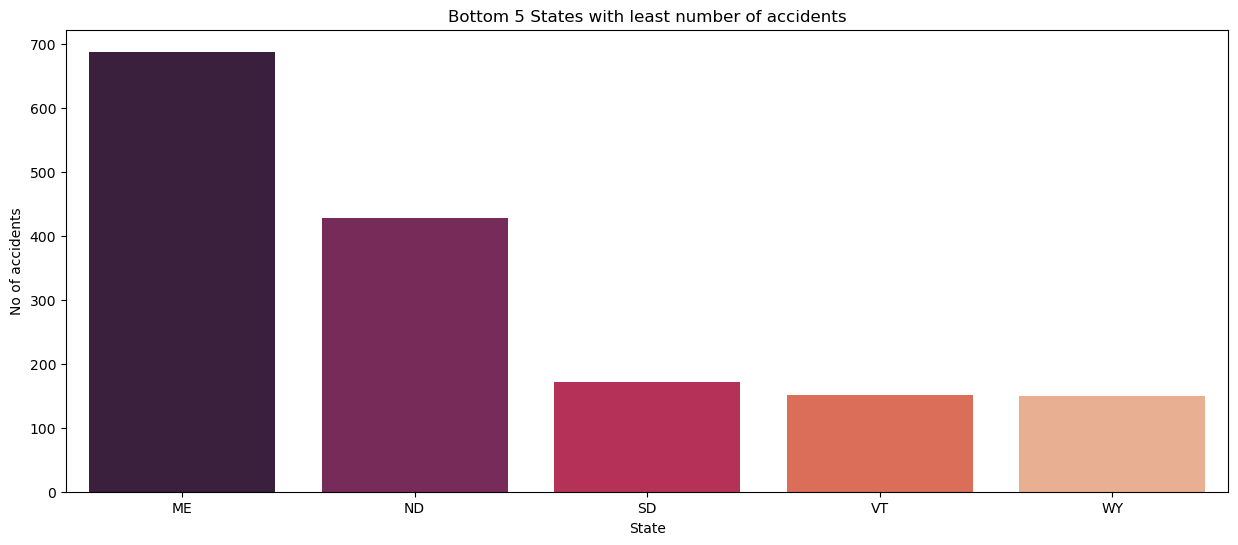

In [42]:
## States with most number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.head(5),palette='rocket')
plt.title("Top 5 States with most number of accidents")
plt.ylabel("No of accidents")
plt.show()

## States with the least number of accidents
plt.figure(figsize=(15,6))
sns.barplot(x='State',y='count',data= state_acc.tail(5),palette='rocket')
plt.title("Bottom 5 States with least number of accidents")
plt.ylabel("No of accidents")
plt.show()

`Observations:`
- Miami is the city with most number of accidents
- starjunction, stomsburg are among the cities with least number of accidents
- California is the state with highest cases of accident
- South Dakota(SD) is the state with least cases of accident

In [43]:
df['Severity'].value_counts().index

Index([2, 3, 4, 1], dtype='int64', name='Severity')

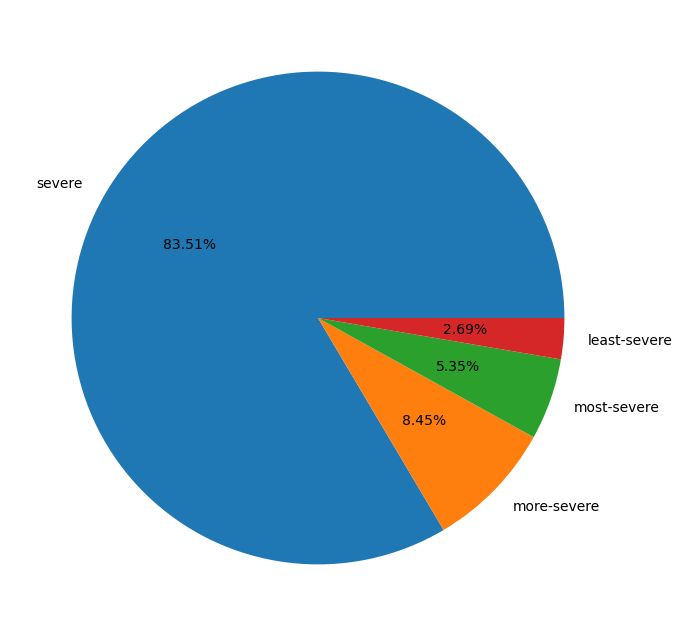

In [44]:
plt.figure(figsize=(8,8))
plt.pie(df['Severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [45]:
# Convert the 'Start_Time' column to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year from the 'Start_Time' column and store it in a new column called 'Year'
df['Year'] = df['Start_Time'].dt.year

# Display the first few rows to verify
print(df[['Start_Time', 'Year']].head())

           Start_Time    Year
0 2016-08-02 00:37:00  2016.0
1 2016-08-02 05:56:00  2016.0
2 2016-08-02 06:15:00  2016.0
3 2016-08-02 06:15:00  2016.0
4 2016-08-02 06:51:00  2016.0


In [46]:
df['Year'].value_counts()

Year
2020.0    254647
2016.0     49605
2017.0     43185
2019.0     11835
2018.0         2
Name: count, dtype: int64

## Years with most number of accidents

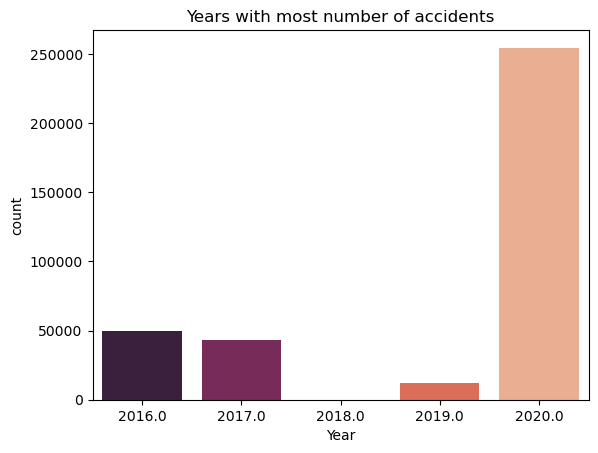

In [47]:
year_count = df['Year'].value_counts().reset_index()
sns.barplot(x='Year',y='count',data=year_count,palette='rocket')
plt.title("Years with most number of accidents")
plt.show()

`Observation:`
- year 2021 had highest accident rates.

## Number of accidents at different time zones

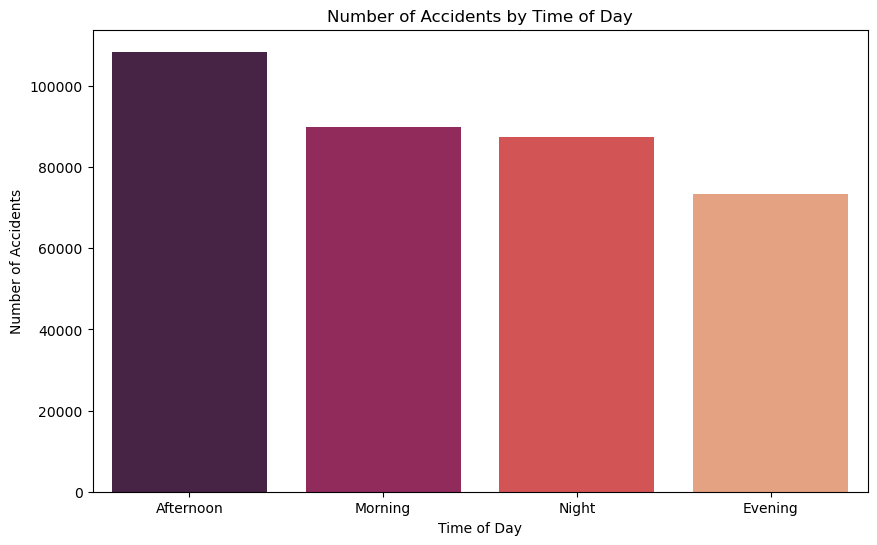

In [48]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the time and store it in a new column 'Time'
df['Time'] = df['Start_Time'].dt.time

# Function to categorize time
def categorize_time(time):
    if pd.isna(time):
        return 'Unknown'
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('17:00:00').time() and time < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'Time_Zone'
df['Time_Zone'] = df['Time'].apply(categorize_time)

# Filter out 'Unknown' time zones for plotting
filtered_df = df[df['Time_Zone'] != 'Unknown']


# Count the number of accidents in each timezone
time_zone_counts = filtered_df['Time_Zone'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=time_zone_counts.index, y=time_zone_counts.values, palette='rocket')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Time of Day')
plt.show()

## histogram to show the distribution of accidents through the time zones

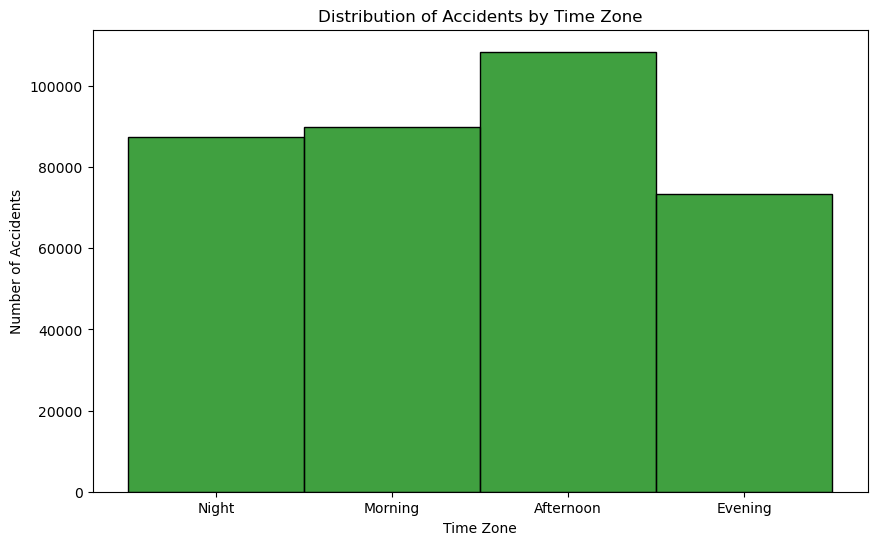

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Time_Zone'], bins=4, kde=False, color='green')
plt.xlabel('Time Zone')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Time Zone')
plt.show()

## Weather conditions at the time of accidents

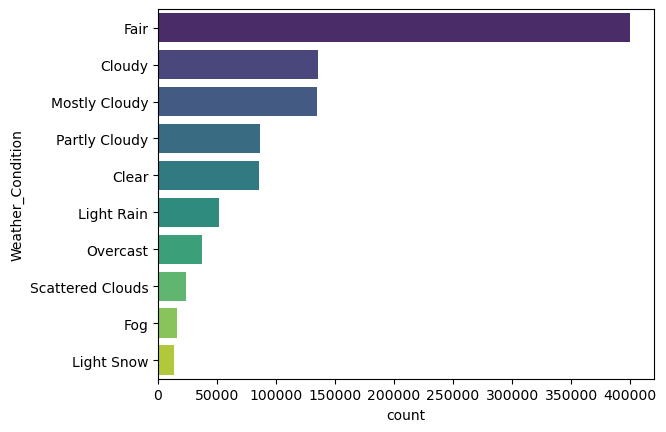

In [50]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(x='count',y='Weather_Condition',data=weather[:10],orient='horizontal',palette='viridis')
plt.show() 

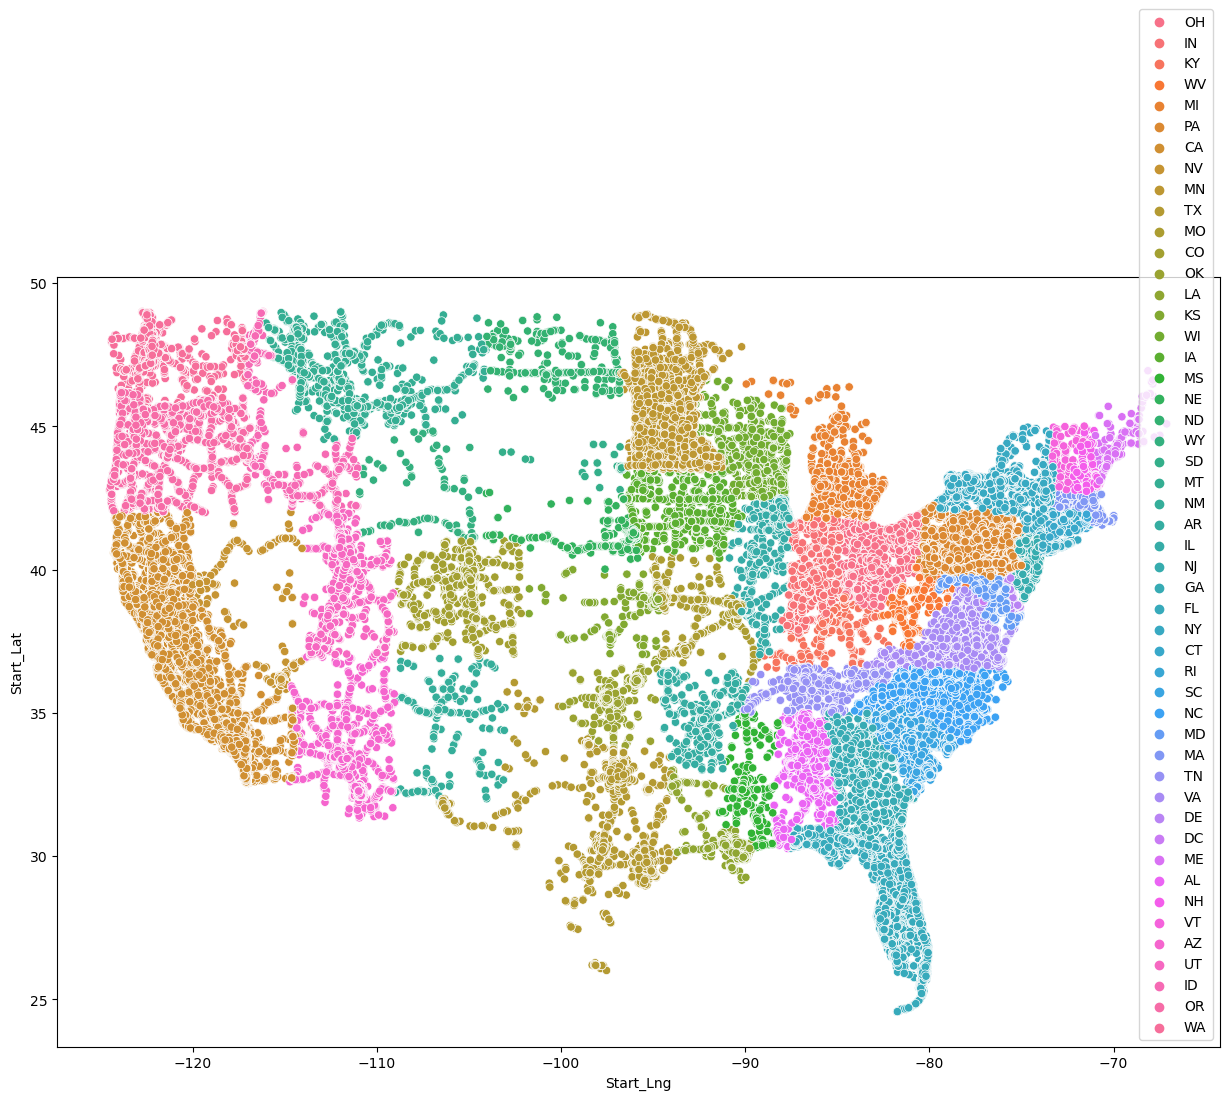

In [51]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['State'])
plt.legend(loc="lower right")
plt.show()


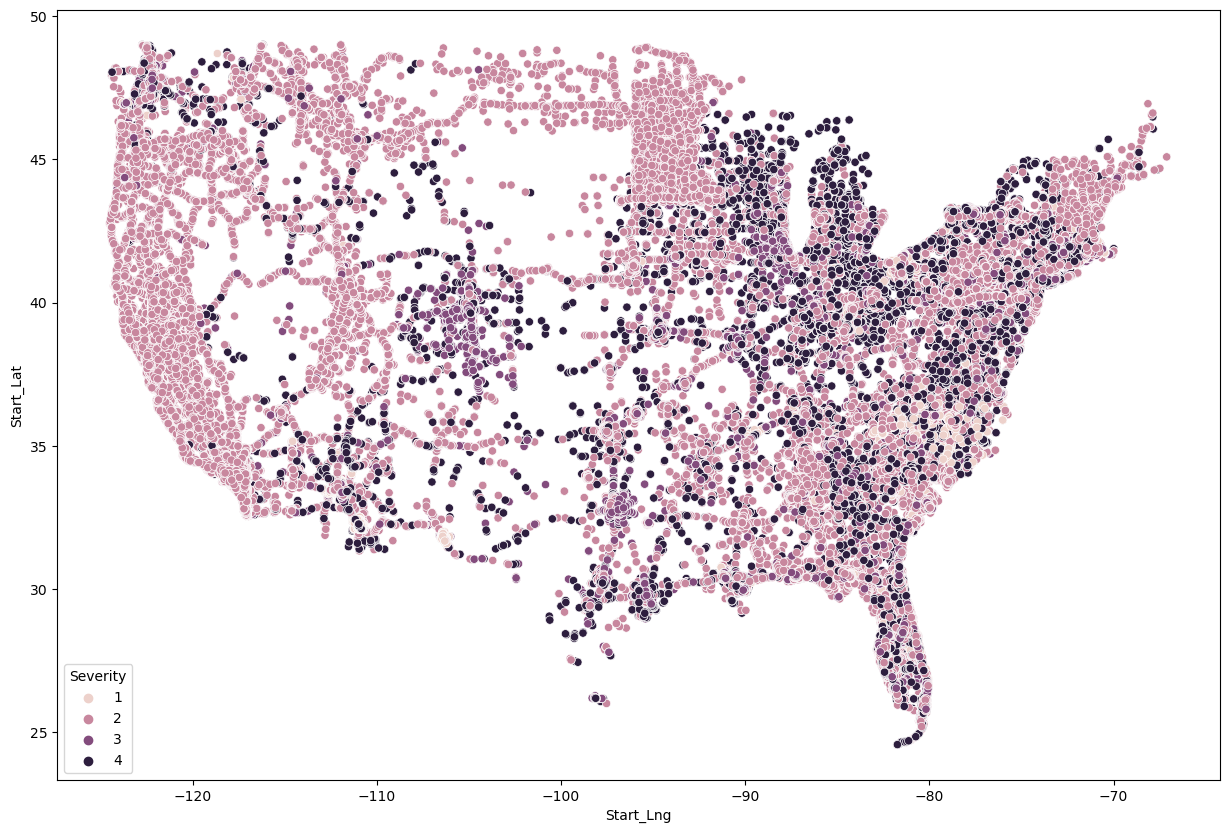

In [52]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],hue=df['Severity'])
plt.show()